In [1]:
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

/home/diego/anaconda3/envs/PyTorch_GPU/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
img = read('Hemanvi.jpeg')

--2023-10-18 15:44:58--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-10-18 15:44:59--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc17814d3a0080d3a228f3c6347e.dl.dropboxusercontent.com/cd/0/inline/CF1wXX7N0gGJa2IMc4i2l6uz7M1Z6A5wWpKJGbpFpu9NYwR8uSdJ6vxqKw3CulenkwAh6E5X__BhaCqUDOqufCjIg8JK3mBm7LBT9AiVigLfbvVqT8liB7NmNXy6bEWD5Q77ZCAeDE7dT6EJtREq-SWV/file# [following]
--2023-10-18 15:44:59--  https://uc17814d3a0080d3a228f3c6347e.dl.dropboxusercontent.com/cd/0/inline/CF1wXX7N0gGJa2IMc4i2l6uz7M1Z6A5wWpKJGbpFpu9NYwR8uSdJ6vxqKw3CulenkwAh6E5X__BhaCqUDOqufCjIg8JK3mBm7LB

In [5]:
segment_fz = felzenszwalb(img, scale=200)

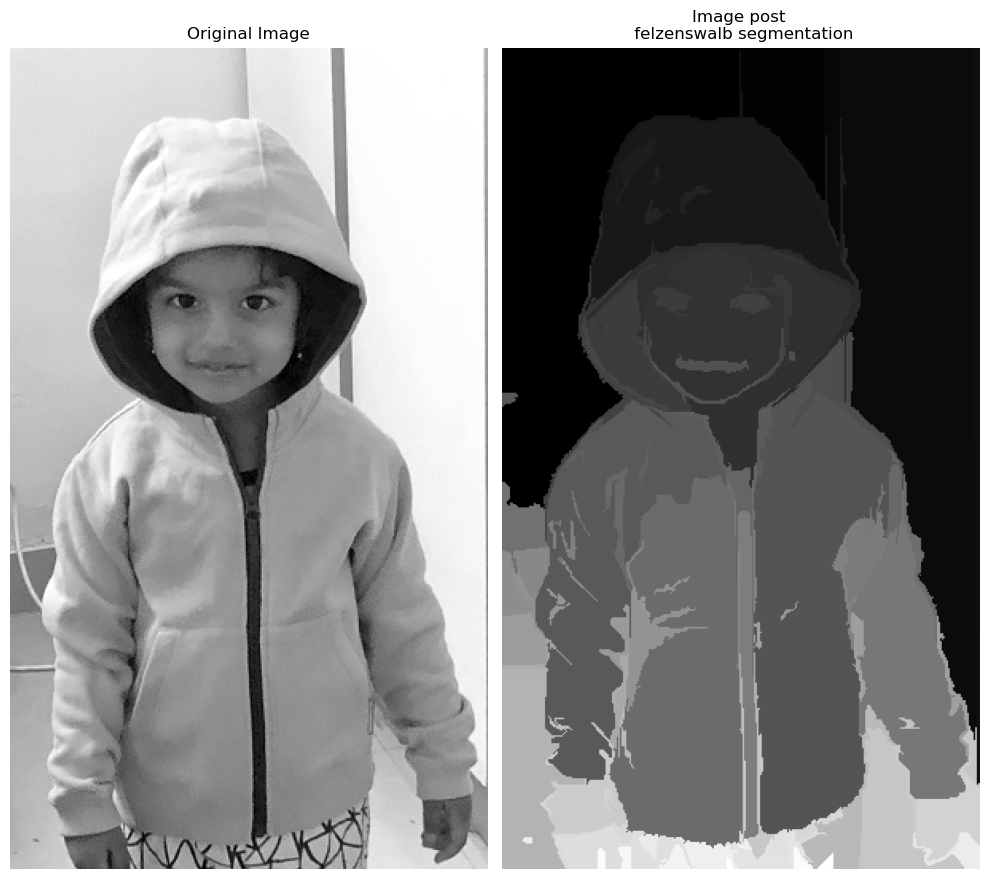

In [6]:
subplots([img, segment_fz], titles = ['Original Image', 'Image post \n felzenswalb segmentation'], sz=10, nc=2)

In [7]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates

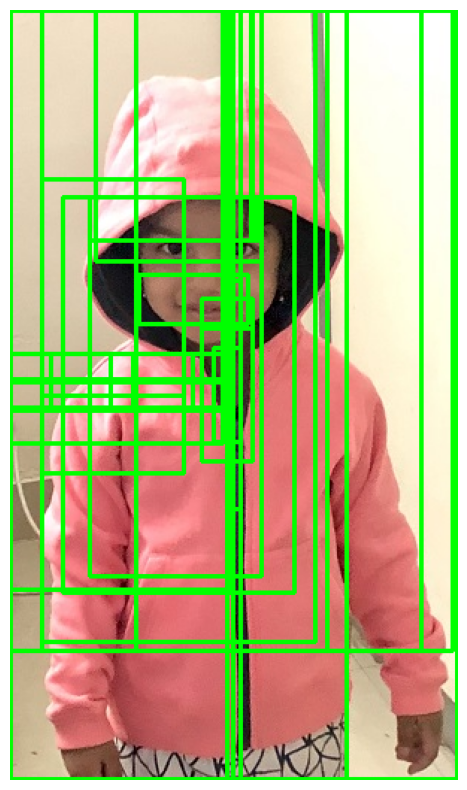

In [9]:
img = read('Hemanvi.jpeg', 1)
candidates = extract_candidates(img)
show(img, bbs=candidates)